In [80]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [81]:
df_tr=pd.read_excel('all_names.xlsx')

In [82]:
df_tr.head()

,Names,Origin
0,abbott leslie b,usa
1,abbott peggy s,usa
2,abernathy rebecca r,usa
3,abidin antoinette,usa
4,able shaylene n,usa


In [83]:
df_tr[['Origin']].apply(lambda x : len(x.unique()))

Origin    4
dtype: int64

In [84]:
df_tr['Origin'].value_counts()

indian     15383
Chinese    10822
usa         4600
africa      2438
Name: Origin, dtype: int64

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_tr['Origin']=le.fit_transform(df_tr['Origin'].astype(str))


In [86]:
df_tr['Origin'].unique() 

array([3, 1, 2, 0], dtype=int64)

In [87]:
df_tr['Origin'].value_counts()

2    15383
0    10822
3     4600
1     2438
Name: Origin, dtype: int64

In [88]:
df_tr.head()

,Names,Origin
0,abbott leslie b,3
1,abbott peggy s,3
2,abernathy rebecca r,3
3,abidin antoinette,3
4,able shaylene n,3


In [89]:
df_tr['Origin'].head()

0    3
1    3
2    3
3    3
4    3
Name: Origin, dtype: int64

In [90]:
yees=df_tr['Origin']

In [91]:
yees.head()

0    3
1    3
2    3
3    3
4    3
Name: Origin, dtype: int64

In [92]:
yees.shape

(33243,)

In [93]:

df_tr_after_drop=df_tr.drop(['Origin'],axis=1)

In [94]:
names = []
names =df_tr_after_drop['Names'].tolist()

In [95]:
df_tr_after_drop['Names']=df_tr_after_drop['Names'].astype(str)

In [96]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import re

names = []
# tqdm is for printing the status bar
for sentance in tqdm(df_tr_after_drop['Names'].values):
    sentance = BeautifulSoup(sentance,'lxml').get_text()
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = ' '.join(e.lower() for e in sentance.split())
    names.append(sentance.strip())

100%|██████████████████████████████████| 33243/33243 [00:07<00:00, 4444.59it/s]


In [97]:
type(names)

list

In [98]:
len(names)

33243

In [99]:
len(yees)

33243

In [101]:

#spilliting data 
from sklearn.model_selection import train_test_split

# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(names, yees, test_size=0.2,random_state=42)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2,random_state=42)

In [102]:
#code for BRUTE version

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() 
Xbow_tr = count_vect.fit_transform(X_tr)
Xbow_test = count_vect.transform(X_test)
Xbow_cv = count_vect.transform(X_cv)
print("the type of count vectorizer :",type(X_tr))
print("the shape of out text BOW vectorizer : ",Xbow_tr.get_shape())
print("the number of unique words :", Xbow_tr.get_shape()[1])

the type of count vectorizer : <class 'list'>
the shape of out text BOW vectorizer :  (21275, 7914)
the number of unique words : 7914


In [103]:
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

# ===================================================================================

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xbow_tr, y_tr)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
print(len(clf.predict(Xbow_cv)))



5319


In [106]:
Xbow_cv

<5319x7914 sparse matrix of type '<class 'numpy.int64'>'
	with 8301 stored elements in Compressed Sparse Row format>

In [107]:
y=clf.predict(Xbow_cv)

In [108]:
y

array([2, 0, 2, ..., 1, 2, 2], dtype=int64)

In [113]:
df_tr['Origin'].value_counts()

2    15383
0    10822
3     4600
1     2438
Name: Origin, dtype: int64

In [115]:
k=l=z=0

x=0
for i in range (5319):
    if(y[i]==2):
        x=x+1
print(x) 
for i in range (5319):
    if(y[i]==0):
        k=k+1
print(k)  
for i in range (5319):
    if(y[i]==3):
        z=z+1
print(z)  
for i in range (5319):
    if(y[i]==1):
        l=l+1
print(l) 

2647
1754
773
145


In [121]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_cv, y)

In [122]:
print(score)

0.9105094942658395


In [124]:

# Creating alpha values in the range from 10^-4 to 10^4
alpha = []
i = 0.0001
while(i<=10000):
    alpha.append(np.round(i,4))
    i *= 4
auc1=[]
auc2=[]

for k in alpha:
    # instantiate learning model (k)
    mnb = MultinomialNB(alpha = k)

    # fitting the model on crossvalidation train
    mnb.fit(Xbow_tr, y_tr)
    
    probs = mnb.predict(Xbow_tr)
    score = accuracy_score(y_tr, probs)
    auc1.append(score)
    
    
    probs = mnb.predict(Xbow_cv)
    score = accuracy_score(y_cv, probs)
    auc2.append(score)

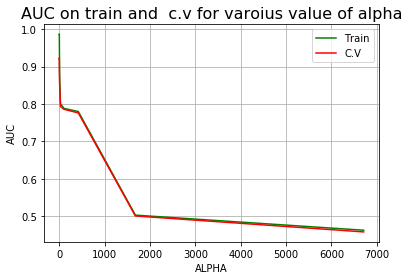

In [126]:
plt.title('AUC on train and  c.v for varoius value of alpha',size=16)
plt.plot(alpha, auc1,'g',label ='Train')
plt.plot(alpha, auc2,'r',label ='C.V')

plt.ylabel('AUC',size=10)
plt.xlabel('ALPHA',size=10)
plt.grid()
plt.legend()
plt.show()

In [127]:
print(alpha)
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')

print(auc1)

print('--------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print(auc2)

[0.0001, 0.0004, 0.0016, 0.0064, 0.0256, 0.1024, 0.4096, 1.6384, 6.5536, 26.2144, 104.8576, 419.4304, 1677.7216, 6710.8864]
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
[0.986556991774383, 0.986556991774383, 0.9866509988249119, 0.9866039952996475, 0.9866039952996475, 0.9860869565217392, 0.9825146886016451, 0.9698237367802586, 0.8756286721504113, 0.800235017626322, 0.7880611045828437, 0.7798354876615746, 0.5027027027027027, 0.46232667450058756]
--------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
[0.9216018048505358, 0.9216018048505358, 0.9219778153788306, 0.9219778153788306, 0.9219778153788306, 0.922165820642978, 0.9214137995863885, 0.9035532994923858, 0.8548599360782102, 0.7930062041737168, 0.7858620041361158, 0.77608

In [128]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
mnb = MultinomialNB(alpha =0)

# fitting the model
mnb.fit(Xbow_tr, y_tr)

# predict the response
pred = mnb.predict(Xbow_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the multinomial N.B classifier for alpha = %f is %f%%' % (0, acc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)



The accuracy of the multinomial N.B classifier for alpha = 0.000000 is 92.615431%
